from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fml.csv to fml (2).csv


In [ ]:
df = pd.read_csv('fml (2).csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,X,link,title,author,text,keywords,tags,compound,neg,neu,pos,polarity,subjectivity,bd,tneg,tneu,tpos,tsub,tpol,sent,leftc,rightc
0,0,1,0,https://kindest.com/442355-defend-democracy-to...,"Defend Democracy Today: Support Fearless, Insi...",[],"While the election has come and gone, the figh...","['reporting', 'come', 'today', 'access', 'chec...",set(),0.8612,0.063,0.819,0.118,0.165589,0.539782,left,0.000,0.472,0.528,0.000000,0.000000,"['While the election has come and gone, the fi...",0,12
1,1,2,1,https://www.alternet.org/2021/03/dan-crenshaw/,Republican Dan Crenshaw goes down in flames du...,"['Sarah K. Burris', 'Raw Story']",MSNBC host Mehdi Hasan went after Rep. Dan Cre...,"['come', 'didnt', 'going', 'fox', 'biden', 'cr...",{'Religious right'},0.6474,0.055,0.876,0.069,-0.034989,0.411162,left,0.000,1.000,0.000,-0.155556,0.288889,"['MSNBC host Mehdi Hasan went after Rep', ' Da...",4,6
2,2,3,2,https://www.alternet.org/2021/03/rep-dan-crens...,Rep. Dan Crenshaw purchased stock during pande...,['Meaghan Ellis'],Rep. Dan Crenshaw's (R-Texas) stock purchase h...,"['purchased', 'transactions', 'law', 'pandemic...",{'Religious right'},-0.8949,0.082,0.860,0.058,0.011441,0.323766,left,0.231,0.769,0.000,-0.500000,0.300000,"['Rep', "" Dan Crenshaw's (R-Texas) stock purch...",0,6
3,3,4,3,https://www.alternet.org/2020/11/dan-crenshaw/,Sen. Ed Markey applauded for silent dismissal ...,"['Walter Einenkel', 'Daily Kos']",Sen. Ed Markey is the Massachusetts Democrat w...,"['district', 'lame', 'markey', 'office', 'rep'...",{'Religious right'},0.9289,0.071,0.811,0.118,0.081250,0.439912,left,0.304,0.567,0.129,-0.250000,0.425000,"['Sen', ' Ed Markey is the Massachusetts Democ...",0,6
4,4,5,4,https://www.alternet.org/2019/05/rep-dan-crens...,Rep. Dan Crenshaw gets cornered on The View fo...,"['Travis Gettys', 'Raw Story']",Rep. Dan Crenshaw (R-TX) appeared on “The View...,"['words', 'view', 'offering', 'think', 'omar',...",{'Religious right'},-0.4810,0.077,0.848,0.075,0.045094,0.453717,left,0.088,0.798,0.113,-0.191667,0.525000,"['Rep', ' Dan Crenshaw (R-TX) appeared on “The...",2,2


In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,X,link,title,author,text,keywords,tags,compound,neg,neu,pos,polarity,subjectivity,bd,tneg,tneu,tpos,tsub,tpol,sent,leftc,rightc
0,0,1,0,https://kindest.com/442355-defend-democracy-to...,"Defend Democracy Today: Support Fearless, Insi...",[],"While the election has come and gone, the figh...","['reporting', 'come', 'today', 'access', 'chec...",set(),0.8612,0.063,0.819,0.118,0.165589,0.539782,left,0.000,0.472,0.528,0.000000,0.000000,"['While the election has come and gone, the fi...",0,12
1,1,2,1,https://www.alternet.org/2021/03/dan-crenshaw/,Republican Dan Crenshaw goes down in flames du...,"['Sarah K. Burris', 'Raw Story']",MSNBC host Mehdi Hasan went after Rep. Dan Cre...,"['come', 'didnt', 'going', 'fox', 'biden', 'cr...",{'Religious right'},0.6474,0.055,0.876,0.069,-0.034989,0.411162,left,0.000,1.000,0.000,-0.155556,0.288889,"['MSNBC host Mehdi Hasan went after Rep', ' Da...",4,6
2,2,3,2,https://www.alternet.org/2021/03/rep-dan-crens...,Rep. Dan Crenshaw purchased stock during pande...,['Meaghan Ellis'],Rep. Dan Crenshaw's (R-Texas) stock purchase h...,"['purchased', 'transactions', 'law', 'pandemic...",{'Religious right'},-0.8949,0.082,0.860,0.058,0.011441,0.323766,left,0.231,0.769,0.000,-0.500000,0.300000,"['Rep', "" Dan Crenshaw's (R-Texas) stock purch...",0,6
3,3,4,3,https://www.alternet.org/2020/11/dan-crenshaw/,Sen. Ed Markey applauded for silent dismissal ...,"['Walter Einenkel', 'Daily Kos']",Sen. Ed Markey is the Massachusetts Democrat w...,"['district', 'lame', 'markey', 'office', 'rep'...",{'Religious right'},0.9289,0.071,0.811,0.118,0.081250,0.439912,left,0.304,0.567,0.129,-0.250000,0.425000,"['Sen', ' Ed Markey is the Massachusetts Democ...",0,6
4,4,5,4,https://www.alternet.org/2019/05/rep-dan-crens...,Rep. Dan Crenshaw gets cornered on The View fo...,"['Travis Gettys', 'Raw Story']",Rep. Dan Crenshaw (R-TX) appeared on “The View...,"['words', 'view', 'offering', 'think', 'omar',...",{'Religious right'},-0.4810,0.077,0.848,0.075,0.045094,0.453717,left,0.088,0.798,0.113,-0.191667,0.525000,"['Rep', ' Dan Crenshaw (R-TX) appeared on “The...",2,2


In [ ]:
import pandas as pd
#Run Libraries
!pip install nltk
!pip install newspaper3k
from newspaper import Article
import newspaper
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,X,compound,neg,neu,pos,polarity,subjectivity,tneg,tneu,tpos,tsub,tpol,leftc,rightc
count,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.00000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000
mean,2110.000000,2111.000000,1076.143094,0.186628,0.068364,0.773186,0.08501,0.078327,0.387728,0.118299,0.801440,0.080263,0.029468,0.238767,4.111585,2.280028
std,1218.642072,1218.642072,644.961327,0.832206,0.049356,0.224446,0.05015,0.098404,0.145262,0.158471,0.186182,0.132614,0.251013,0.305852,8.191465,8.744274
min,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.00000,-0.408333,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-10.000000,-125.000000
25%,1055.000000,1056.000000,527.000000,-0.872000,0.035000,0.787000,0.05400,0.018146,0.355111,0.000000,0.667000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2110.000000,2111.000000,1055.000000,0.599400,0.065000,0.832000,0.08300,0.075973,0.414695,0.000000,0.804000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,3165.000000,3166.000000,1582.000000,0.979900,0.095000,0.869000,0.11500,0.125000,0.465000,0.227000,1.000000,0.157000,0.045455,0.454545,4.000000,4.000000
max,4220.000000,4221.000000,2410.000000,1.000000,0.404000,1.000000,0.44800,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,103.000000,117.000000


In [ ]:
df.head()

,Unnamed: 0,X,link,pdate,title,author,text,keywords,tags,compound,neg,neu,pos,polarity,subjectivity,bd
0,1,0,https://kindest.com/442355-defend-democracy-to...,NaN,"Defend Democracy Today: Support Fearless, Insi...",[],"While the election has come and gone, the figh...","['reporting', 'come', 'today', 'access', 'chec...",set(),0.8612,0.063,0.819,0.118,0.165589,0.539782,left
1,2,1,https://www.alternet.org/2021/03/dan-crenshaw/,2021-03-22 10:17:36+00:00,Republican Dan Crenshaw goes down in flames du...,"['Sarah K. Burris', 'Raw Story']",MSNBC host Mehdi Hasan went after Rep. Dan Cre...,"['come', 'didnt', 'going', 'fox', 'biden', 'cr...",{'Religious right'},0.6474,0.055,0.876,0.069,-0.034989,0.411162,left
2,3,2,https://www.alternet.org/2021/03/rep-dan-crens...,2021-03-09 13:32:36+00:00,Rep. Dan Crenshaw purchased stock during pande...,['Meaghan Ellis'],Rep. Dan Crenshaw's (R-Texas) stock purchase h...,"['purchased', 'transactions', 'law', 'pandemic...",{'Religious right'},-0.8949,0.082,0.860,0.058,0.011441,0.323766,left
3,4,3,https://www.alternet.org/2020/11/dan-crenshaw/,2020-11-23 12:14:56+00:00,Sen. Ed Markey applauded for silent dismissal ...,"['Walter Einenkel', 'Daily Kos']",Sen. Ed Markey is the Massachusetts Democrat w...,"['district', 'lame', 'markey', 'office', 'rep'...",{'Religious right'},0.9289,0.071,0.811,0.118,0.081250,0.439912,left
4,5,4,https://www.alternet.org/2019/05/rep-dan-crens...,2019-05-06 17:40:27+00:00,Rep. Dan Crenshaw gets cornered on The View fo...,"['Travis Gettys', 'Raw Story']",Rep. Dan Crenshaw (R-TX) appeared on “The View...,"['words', 'view', 'offering', 'think', 'omar',...",{'Religious right'},-0.4810,0.077,0.848,0.075,0.045094,0.453717,left


In [ ]:
# Dataset to work on
dm=df
dm = dm.drop(['pdate'], axis = 1)

In [ ]:
# sentiment analysis of title
tneg=[]
tneu=[]
tpos=[]
tsub=[]
tpol=[]
for title in dm["title"]:
  v=sia.polarity_scores(title)
  tneg.append(v["neg"])
  tneu.append(v["neu"])
  tpos.append(v["pos"])
  testimonial = TextBlob(title)
  tsub.append(testimonial.sentiment.polarity)
  tpol.append(testimonial.sentiment.subjectivity)


In [ ]:
# entering into the dataset
dm['tneg'] = tneg
dm['tneu'] = tneu
dm['tpos'] = tpos
dm['tsub'] = tsub
dm['tpol'] = tpol

In [ ]:
dm.head()

,Unnamed: 0,X,link,title,author,text,keywords,tags,compound,neg,neu,pos,polarity,subjectivity,bd,tneg,tneu,tpos,tsub,tpol
0,1,0,https://kindest.com/442355-defend-democracy-to...,"Defend Democracy Today: Support Fearless, Insi...",[],"While the election has come and gone, the figh...","['reporting', 'come', 'today', 'access', 'chec...",set(),0.8612,0.063,0.819,0.118,0.165589,0.539782,left,0.000,0.472,0.528,0.000000,0.000000
1,2,1,https://www.alternet.org/2021/03/dan-crenshaw/,Republican Dan Crenshaw goes down in flames du...,"['Sarah K. Burris', 'Raw Story']",MSNBC host Mehdi Hasan went after Rep. Dan Cre...,"['come', 'didnt', 'going', 'fox', 'biden', 'cr...",{'Religious right'},0.6474,0.055,0.876,0.069,-0.034989,0.411162,left,0.000,1.000,0.000,-0.155556,0.288889
2,3,2,https://www.alternet.org/2021/03/rep-dan-crens...,Rep. Dan Crenshaw purchased stock during pande...,['Meaghan Ellis'],Rep. Dan Crenshaw's (R-Texas) stock purchase h...,"['purchased', 'transactions', 'law', 'pandemic...",{'Religious right'},-0.8949,0.082,0.860,0.058,0.011441,0.323766,left,0.231,0.769,0.000,-0.500000,0.300000
3,4,3,https://www.alternet.org/2020/11/dan-crenshaw/,Sen. Ed Markey applauded for silent dismissal ...,"['Walter Einenkel', 'Daily Kos']",Sen. Ed Markey is the Massachusetts Democrat w...,"['district', 'lame', 'markey', 'office', 'rep'...",{'Religious right'},0.9289,0.071,0.811,0.118,0.081250,0.439912,left,0.304,0.567,0.129,-0.250000,0.425000
4,5,4,https://www.alternet.org/2019/05/rep-dan-crens...,Rep. Dan Crenshaw gets cornered on The View fo...,"['Travis Gettys', 'Raw Story']",Rep. Dan Crenshaw (R-TX) appeared on “The View...,"['words', 'view', 'offering', 'think', 'omar',...",{'Religious right'},-0.4810,0.077,0.848,0.075,0.045094,0.453717,left,0.088,0.798,0.113,-0.191667,0.525000


In [ ]:
# Converting text into string
dm['text'] = dm['text'].astype(str)

## Rated column

In [ ]:
# keyword list
lib=["biden","joe biden","refugees","bidens","senate","tax","taxes","migrants","democrats","hiliary","clinton","impeachment","troll","moron","shill","hack","fool","crony","elitist","billionaire","commie","china","green","deforestation","sustainable","fauci","vaccinate","gop","minority","voting","darpa","right","african","asylum","immigration","guatemala","obama","obamas","greta","environment","Ilhan Omar"]
con=["trump","donald trump","border","qanon","oil","coal","pandemic","republicans","pence","mike pence","russiagate","gerrymandering","putin","russia","maralago","white","evangelicals","christian","israel","bible","relegion","extremist","coward","obstructionist","zealot","cults","oilandgas","fox","war","left","libtard","mask","covid19","netanyahu","kushner","idealogue","extremist","thug","rep","deport","mexico","nationalist"]

In [ ]:
# Removing punctuation and separating into sentences
#sent=[]
#remove = [",",";","'s", "@", "&","*","(",")","#","!","%","=","+","-","_",":", '"',"'","\r","\n","\r\n\r\n"]
#for tt in dm['text']:
#  dm['text']=dm['text'].replace(remove,"")
dm['sent']=dm['text'].str.split(".")


In [ ]:
dm.head()

,Unnamed: 0,X,link,title,author,text,keywords,tags,compound,neg,neu,pos,polarity,subjectivity,bd,tneg,tneu,tpos,tsub,tpol,sent
0,1,0,https://kindest.com/442355-defend-democracy-to...,"Defend Democracy Today: Support Fearless, Insi...",[],"While the election has come and gone, the figh...","['reporting', 'come', 'today', 'access', 'chec...",set(),0.8612,0.063,0.819,0.118,0.165589,0.539782,left,0.000,0.472,0.528,0.000000,0.000000,"[While the election has come and gone, the fig..."
1,2,1,https://www.alternet.org/2021/03/dan-crenshaw/,Republican Dan Crenshaw goes down in flames du...,"['Sarah K. Burris', 'Raw Story']",MSNBC host Mehdi Hasan went after Rep. Dan Cre...,"['come', 'didnt', 'going', 'fox', 'biden', 'cr...",{'Religious right'},0.6474,0.055,0.876,0.069,-0.034989,0.411162,left,0.000,1.000,0.000,-0.155556,0.288889,"[MSNBC host Mehdi Hasan went after Rep, Dan C..."
2,3,2,https://www.alternet.org/2021/03/rep-dan-crens...,Rep. Dan Crenshaw purchased stock during pande...,['Meaghan Ellis'],Rep. Dan Crenshaw's (R-Texas) stock purchase h...,"['purchased', 'transactions', 'law', 'pandemic...",{'Religious right'},-0.8949,0.082,0.860,0.058,0.011441,0.323766,left,0.231,0.769,0.000,-0.500000,0.300000,"[Rep, Dan Crenshaw's (R-Texas) stock purchase..."
3,4,3,https://www.alternet.org/2020/11/dan-crenshaw/,Sen. Ed Markey applauded for silent dismissal ...,"['Walter Einenkel', 'Daily Kos']",Sen. Ed Markey is the Massachusetts Democrat w...,"['district', 'lame', 'markey', 'office', 'rep'...",{'Religious right'},0.9289,0.071,0.811,0.118,0.081250,0.439912,left,0.304,0.567,0.129,-0.250000,0.425000,"[Sen, Ed Markey is the Massachusetts Democrat..."
4,5,4,https://www.alternet.org/2019/05/rep-dan-crens...,Rep. Dan Crenshaw gets cornered on The View fo...,"['Travis Gettys', 'Raw Story']",Rep. Dan Crenshaw (R-TX) appeared on “The View...,"['words', 'view', 'offering', 'think', 'omar',...",{'Religious right'},-0.4810,0.077,0.848,0.075,0.045094,0.453717,left,0.088,0.798,0.113,-0.191667,0.525000,"[Rep, Dan Crenshaw (R-TX) appeared on “The Vi..."


In [ ]:
dn=dm
dn

,Unnamed: 0,X,link,title,author,text,keywords,tags,compound,neg,neu,pos,polarity,subjectivity,bd,tneg,tneu,tpos,tsub,tpol,sent
0,1,0,https://kindest.com/442355-defend-democracy-to...,"Defend Democracy Today: Support Fearless, Insi...",[],"While the election has come and gone, the figh...","['reporting', 'come', 'today', 'access', 'chec...",set(),0.8612,0.063,0.819,0.118,0.165589,0.539782,left,0.000,0.472,0.528,0.000000,0.000000,"[While the election has come and gone, the fig..."
1,2,1,https://www.alternet.org/2021/03/dan-crenshaw/,Republican Dan Crenshaw goes down in flames du...,"['Sarah K. Burris', 'Raw Story']",MSNBC host Mehdi Hasan went after Rep. Dan Cre...,"['come', 'didnt', 'going', 'fox', 'biden', 'cr...",{'Religious right'},0.6474,0.055,0.876,0.069,-0.034989,0.411162,left,0.000,1.000,0.000,-0.155556,0.288889,"[MSNBC host Mehdi Hasan went after Rep, Dan C..."
2,3,2,https://www.alternet.org/2021/03/rep-dan-crens...,Rep. Dan Crenshaw purchased stock during pande...,['Meaghan Ellis'],Rep. Dan Crenshaw's (R-Texas) stock purchase h...,"['purchased', 'transactions', 'law', 'pandemic...",{'Religious right'},-0.8949,0.082,0.860,0.058,0.011441,0.323766,left,0.231,0.769,0.000,-0.500000,0.300000,"[Rep, Dan Crenshaw's (R-Texas) stock purchase..."
3,4,3,https://www.alternet.org/2020/11/dan-crenshaw/,Sen. Ed Markey applauded for silent dismissal ...,"['Walter Einenkel', 'Daily Kos']",Sen. Ed Markey is the Massachusetts Democrat w...,"['district', 'lame', 'markey', 'office', 'rep'...",{'Religious right'},0.9289,0.071,0.811,0.118,0.081250,0.439912,left,0.304,0.567,0.129,-0.250000,0.425000,"[Sen, Ed Markey is the Massachusetts Democrat..."
4,5,4,https://www.alternet.org/2019/05/rep-dan-crens...,Rep. Dan Crenshaw gets cornered on The View fo...,"['Travis Gettys', 'Raw Story']",Rep. Dan Crenshaw (R-TX) appeared on “The View...,"['words', 'view', 'offering', 'think', 'omar',...",{'Religious right'},-0.4810,0.077,0.848,0.075,0.045094,0.453717,left,0.088,0.798,0.113,-0.191667,0.525000,"[Rep, Dan Crenshaw (R-TX) appeared on “The Vi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216,4217,1805,https://www.firstthings.com/web-exclusives/201...,The American Mind Podcast: The Roundtable Epis...,"['Yuval Levin', 'Peter Spiliakos', 'Stanley Ku...",The American Mind’s ‘Editorial Roundtable’ pod...,"['mind', '53', 'tearful', 'williams', 'america...",set(),0.1298,0.039,0.907,0.053,0.088636,0.420455,right,0.000,1.000,0.000,0.000000,0.000000,[The American Mind’s ‘Editorial Roundtable’ po...
4217,4218,1806,https://claremontreviewofbooks.com/american-co...,James Poulos joins the Texas Public Policy Fou...,[],We use cookies on our website to give you the ...,"['foundation', 'joins', 'relevant', 'visits', ...","{'TPPF', 'Totalitarianism', 'James Poulos', 'L...",0.2263,0.000,0.942,0.058,0.450000,0.700000,right,0.000,1.000,0.000,0.000000,0.066667,[We use cookies on our website to give you the...
4218,4219,1807,https://www.thepublicdiscourse.com/2021/02/74146/,Matt Peterson joins the Texas Public Policy Fo...,['Matthew J. Peterson'],There’s a social media site whose glitzy video...,"['matt', 'site', 'foundation', 'swipe', 'joins...","{'TPPF', 'Totalitarianism', 'big tech', 'corpo...",-0.5106,0.068,0.915,0.017,-0.045833,0.291667,right,0.000,1.000,0.000,0.000000,0.066667,[There’s a social media site whose glitzy vide...
4219,4220,1808,https://lawliberty.org/the-three-fault-lines-o...,William Voegeli joins the 10 Blocks podcast,[],We use cookies on our website to give you the ...,"['blocks', 'joins', 'voegeli', 'visits', 'webs...","{'10 Blocks', 'Brian Anderson', 'capitol riots...",0.2263,0.000,0.942,0.058,0.450000,0.700000,right,0.241,0.759,0.000,0.000000,0.000000,[We use cookies on our website to give you the...


# Check Algo
## Liberal Keyword + negative sentance = Rigth bias++
## Liberal Keyword + positive sentance = left bias++
## Conservative Keyword + positive sentance = Rigth bias++
## Conservative Keyword + negative sentance = left bias++

In [ ]:
# algo to check sentiment according to keywords
leftcheck=[]
rightcheck=[]
b=0
br=0

for m in dn['sent']:
  for x in m:
    for y in lib:
      if y in x:
        b=b+1
        vt=sia.polarity_scores(x)
        if vt["pos"]>vt["neu"]:
          b=b+5
        if vt["neg"]>vt["neu"]:
          b=b-7
        if vt["neg"]>vt["pos"]:
          b=b-1
        else:
          b=b+1
  leftcheck.append(b)
  b=0

for m in dn['sent']:
  for x in m:
    for y in con:
      if y in x:
        br=br+1
        vt=sia.polarity_scores(x)
        if vt["pos"]>vt["neu"]:
          br=br+15
        if vt["neg"]>vt["neu"]:
          br=br-7
        if vt["neg"]>vt["pos"]:
          br=br-3
        else:
          br=br+1
  rightcheck.append(br)
  br=0
  
  



dn['leftc']=leftcheck
dn['rightc']=rightcheck    
dn 

,Unnamed: 0,X,link,title,author,text,keywords,tags,compound,neg,neu,pos,polarity,subjectivity,bd,tneg,tneu,tpos,tsub,tpol,sent,leftc,rightc
0,1,0,https://kindest.com/442355-defend-democracy-to...,"Defend Democracy Today: Support Fearless, Insi...",[],"While the election has come and gone, the figh...","['reporting', 'come', 'today', 'access', 'chec...",set(),0.8612,0.063,0.819,0.118,0.165589,0.539782,left,0.000,0.472,0.528,0.000000,0.000000,"[While the election has come and gone, the fig...",0,12
1,2,1,https://www.alternet.org/2021/03/dan-crenshaw/,Republican Dan Crenshaw goes down in flames du...,"['Sarah K. Burris', 'Raw Story']",MSNBC host Mehdi Hasan went after Rep. Dan Cre...,"['come', 'didnt', 'going', 'fox', 'biden', 'cr...",{'Religious right'},0.6474,0.055,0.876,0.069,-0.034989,0.411162,left,0.000,1.000,0.000,-0.155556,0.288889,"[MSNBC host Mehdi Hasan went after Rep, Dan C...",4,6
2,3,2,https://www.alternet.org/2021/03/rep-dan-crens...,Rep. Dan Crenshaw purchased stock during pande...,['Meaghan Ellis'],Rep. Dan Crenshaw's (R-Texas) stock purchase h...,"['purchased', 'transactions', 'law', 'pandemic...",{'Religious right'},-0.8949,0.082,0.860,0.058,0.011441,0.323766,left,0.231,0.769,0.000,-0.500000,0.300000,"[Rep, Dan Crenshaw's (R-Texas) stock purchase...",0,6
3,4,3,https://www.alternet.org/2020/11/dan-crenshaw/,Sen. Ed Markey applauded for silent dismissal ...,"['Walter Einenkel', 'Daily Kos']",Sen. Ed Markey is the Massachusetts Democrat w...,"['district', 'lame', 'markey', 'office', 'rep'...",{'Religious right'},0.9289,0.071,0.811,0.118,0.081250,0.439912,left,0.304,0.567,0.129,-0.250000,0.425000,"[Sen, Ed Markey is the Massachusetts Democrat...",0,6
4,5,4,https://www.alternet.org/2019/05/rep-dan-crens...,Rep. Dan Crenshaw gets cornered on The View fo...,"['Travis Gettys', 'Raw Story']",Rep. Dan Crenshaw (R-TX) appeared on “The View...,"['words', 'view', 'offering', 'think', 'omar',...",{'Religious right'},-0.4810,0.077,0.848,0.075,0.045094,0.453717,left,0.088,0.798,0.113,-0.191667,0.525000,"[Rep, Dan Crenshaw (R-TX) appeared on “The Vi...",2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216,4217,1805,https://www.firstthings.com/web-exclusives/201...,The American Mind Podcast: The Roundtable Epis...,"['Yuval Levin', 'Peter Spiliakos', 'Stanley Ku...",The American Mind’s ‘Editorial Roundtable’ pod...,"['mind', '53', 'tearful', 'williams', 'america...",set(),0.1298,0.039,0.907,0.053,0.088636,0.420455,right,0.000,1.000,0.000,0.000000,0.000000,[The American Mind’s ‘Editorial Roundtable’ po...,0,0
4217,4218,1806,https://claremontreviewofbooks.com/american-co...,James Poulos joins the Texas Public Policy Fou...,[],We use cookies on our website to give you the ...,"['foundation', 'joins', 'relevant', 'visits', ...","{'TPPF', 'Totalitarianism', 'James Poulos', 'L...",0.2263,0.000,0.942,0.058,0.450000,0.700000,right,0.000,1.000,0.000,0.000000,0.066667,[We use cookies on our website to give you the...,0,2
4218,4219,1807,https://www.thepublicdiscourse.com/2021/02/74146/,Matt Peterson joins the Texas Public Policy Fo...,['Matthew J. Peterson'],There’s a social media site whose glitzy video...,"['matt', 'site', 'foundation', 'swipe', 'joins...","{'TPPF', 'Totalitarianism', 'big tech', 'corpo...",-0.5106,0.068,0.915,0.017,-0.045833,0.291667,right,0.000,1.000,0.000,0.000000,0.066667,[There’s a social media site whose glitzy vide...,0,0
4219,4220,1808,https://lawliberty.org/the-three-fault-lines-o...,William Voegeli joins the 10 Blocks podcast,[],We use cookies on our website to give you the ...,"['blocks', 'joins', 'voegeli', 'visits', 'webs...","{'10 Blocks', 'Brian Anderson', 'capitol riots...",0.2263,0.000,0.942,0.058,0.450000,0.700000,right,0.241,0.759,0.000,0.000000,0.000000,[We use cookies on our website to give you the...,0,2


In [ ]:
print(dn['leftc'].mean())
print(dn['rightc'].mean())

4.111584932480455
2.2800284292821607


In [ ]:
rr=dn[dn["bd"]=="right"]
ll=dn[dn["bd"]=="left"]  
print("The righness of right : " , rr['rightc'].mean())
print("leftness of right : " , rr['leftc'].mean())
print("The righness of left : " , ll['rightc'].mean())
print("leftness of left : " , ll['leftc'].mean())

The righness of right :  1.4701657458563535
leftness of right :  2.369060773480663
The righness of left :  2.888013272501037
leftness of left :  5.41974284529241


In [ ]:
from google.colab import files

dn.to_csv('fml.csv')
files.download('fml.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## The ML ting

In [ ]:
# Finding the best feature
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

NameError: ignored

In [ ]:
dn

NameError: ignored

In [ ]:
dz=df

# Ensemble

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dz=df
dz[['compound', 'neg', 'neu', 'pos' , 'polarity' , 'subjectivity','tpol','tsub','tneg','tneu','tpos','rated','leftc','rightc' ]] = scaler.fit_transform(dz[['compound', 'neg', 'neu', 'pos' , 'polarity' , 'subjectivity','tpol','tsub','tneg','tneu','tpos','rated','leftc','rightc'']])

SyntaxError: ignored

In [ ]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [ ]:
from sklearn.utils import shuffle
dz = shuffle(dz)

In [ ]:
from sklearn.model_selection import train_test_split
X=dz[['compound', 'neg', 'neu', 'pos' , 'polarity' , 'subjectivity','tneg', 'tneu', 'tpos','tpol','tsub','leftc','rightc']]
y=dz['bd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#kfolds
def get_models():
  models = dict()
  models['logreg'] = LogisticRegression()
  models['kNN - '] = KNeighborsClassifier()
  models['CART'] = DecisionTreeClassifier()
  models['SVM'] = SVC()
  models['NBys'] = GaussianNB()
  models['RForest'] = RandomForestClassifier()
  models['Adaboost'] = AdaBoostClassifier()
  return models

In [ ]:
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>logreg 0.639 (0.011)
>kNN -  0.639 (0.024)
>CART 0.635 (0.023)
>SVM 0.635 (0.009)
>NBys 0.637 (0.014)
>RForest 0.703 (0.015)
>Adaboost 0.648 (0.021)


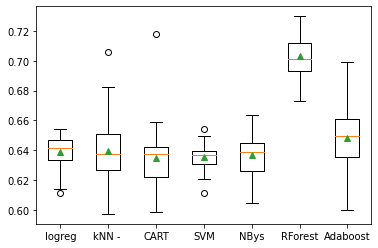

In [ ]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
dn.head()

# Random Foresr

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [ ]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6779794790844514


In [ ]:
import pickle
with open('model_pickle','wb') as f:
  pickle.dump(clf,f)


In [ ]:
with open('pickled_data_file.pkl', 'wb') as fid:
     pickle.dump(clf, fid)

In [ ]:
k=input("Enter the name of the link to be tested - ")
pape = newspaper.build(k,language='en',memorize='false')
article=Article(k)
article.download()
article.parse()
article.nlp()
v=sia.polarity_scores(article.text)
v1=v["compound"]
v2=v["neg"]
v3=v["neu"]
v4=v["pos"]
testimonial = TextBlob(article.text)
v5=testimonial.sentiment.polarity
v6=testimonial.sentiment.subjectivity
tte=article.text
ve=sia.polarity_scores(article.title)
v7=ve["neg"]
v8=ve["neu"]
v9=ve["pos"]
testimonial1 = TextBlob(title)
v10=testimonial1.sentiment.polarity
v11=testimonial1.sentiment.subjectivity
b=0
tt=[]
tt=article.text.split(".")

for m in tt:
  for y in lib:
    if y in m:
      b=b-1
      vt=sia.polarity_scores(x)
    if vt["pos"]>vt["neu"]:
      b=b-5
    if vt["neg"]>vt["neu"]:
      b=b+5
    if vt["neg"]>vt["pos"]:
      b=b+1
    else:
      b=b-1
  else:
    continue
  for z in con:
    if z in m:
     b=b+0.5
     vt1=sia.polarity_scores(x)
     if vt1["neu"]<vt1["pos"]:
       b=b+5
     if vt1["neg"]>vt1["neu"]:
       b=b-5
     if vt1["neg"]>vt1["pos"]:
        b=b-1
     else:
        b=b+1.1
print(b)

new=[[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11]]

Enter the name of the link to be tested - https://www.newsmax.com/alfonsedamato/border-operation-warp-speed/2021/03/15/id/1013864/
-2673


In [ ]:
n1=clf.predict(new)
#n2=clf1.predict(new)
n3=boostmodel.predict(new)
print("Random Forest - ", n1)
#print("SVM - ", n2)
print("Adaboost ", n3)

Random Forest -  ['left']
Adaboost  ['left']


In [ ]:
article.title

'Nolte: Democrats, Bernie Bros Brawl over Joe Biden’s Mental Health'

# ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
mm=DecisionTreeClassifier(criterion='entropy',max_depth=1)
AdaBoost = AdaBoostClassifier(base_estimator=mm,n_estimators=500,learning_rate=1)
boostmodel=AdaBoost.fit(X_train,y_train)

In [ ]:
y_pred=boostmodel.predict(X_test)

In [ ]:
predi=metrics.accuracy_score(y_test,y_pred)
predi

0.6550907655880032

# SVM

In [ ]:
from sklearn import svm 
clf1=svm.SVC(kernel='linear')
clf1.fit(X_train,y_train)
y_pred=clf1.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6440410418310971


# Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6203630623520127


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[725,   8],
       [451,  83]])

# kNN

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6361483820047356


# Naive Bayes

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred  =  classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(cm,ac)

[[686  34]
 [428 119]] 0.6353591160220995


# Neural Network


In [ ]:
import pandas
import joblib
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.metrics
import sklearn.neural_network

In [ ]:
 model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
                                                 alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
                                                 max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                                                 n_iter_no_change=10)
    # Train the model on the whole data set
model.fit(X_train, y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
    # Evaluate on training data
    print('\n-- Training data --')
    predictions = model.predict(X_train)
    accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
    print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
    print('Classification Report:')
    print(sklearn.metrics.classification_report(y_train, predictions))
    print('Confusion Matrix:')
    print(sklearn.metrics.confusion_matrix(y_train, predictions))
    print('')
    # Evaluate on test data
    print('\n---- Test data ----')
    predictions = model.predict(X_test)
    accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
    print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
    print('Classification Report:')
    print(sklearn.metrics.classification_report(y_test, predictions))
    print('Confusion Matrix:')
    print(sklearn.metrics.confusion_matrix(y_test, predictions))


-- Training data --
Accuracy: 76.47
Classification Report:
              precision    recall  f1-score   support

        left       0.75      0.87      0.81      1670
       right       0.79      0.63      0.70      1284

    accuracy                           0.76      2954
   macro avg       0.77      0.75      0.75      2954
weighted avg       0.77      0.76      0.76      2954

Confusion Matrix:
[[1455  215]
 [ 480  804]]


---- Test data ----
Accuracy: 66.69
Classification Report:
              precision    recall  f1-score   support

        left       0.70      0.77      0.73       741
       right       0.62      0.53      0.57       526

    accuracy                           0.67      1267
   macro avg       0.66      0.65      0.65      1267
weighted avg       0.66      0.67      0.66      1267

Confusion Matrix:
[[567 174]
 [248 278]]


# Voting Ensemble

In [ ]:
#Run Libraries
!pip install nltk
!pip install newspaper3k
from newspaper import Article
import newspaper
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
X=dz[['compound', 'neg', 'neu', 'pos' , 'polarity' , 'subjectivity','tneg', 'tneu', 'tpos','tpol','tsub','rated']]
